Last updated: 16 Feb 2023

# 👋 PyCaret Time Series Forecasting Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [71]:
# check installed version
!pip install pycaret[full]
import pycaret
pycaret.__version__

'3.3.2'

# 🚀 Quick start

PyCaret's time series forecasting module is now available. The module currently is suitable for univariate / multivariate time series forecasting tasks. The API of time series module is consistent with other modules of PyCaret.

It comes built-in with preprocessing capabilities and over 30 algorithms comprising of statistical / time-series methods as well as machine learning based models. In addition to the model training, this module has lot of other capabilities such as automated hyperparameter tuning, ensembling, model analysis, model packaging and deployment capabilities.

A typical workflow in PyCaret consist of following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model** <br/>

In [72]:
### loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('airline')

,Number of airline passengers
Period,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


<Axes: xlabel='Period'>

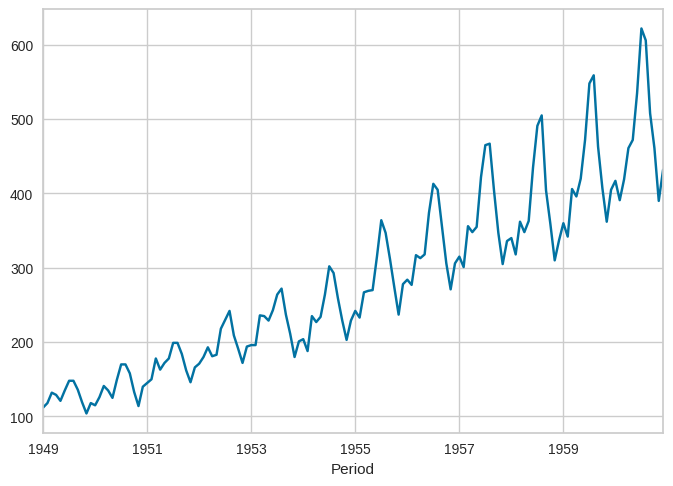

In [73]:
# plot the dataset
data.plot()

## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. `Setup` has only one required parameter i.e. `data`. All the other parameters are optional.

In [74]:
# import pycaret time series and init setup
from pycaret.time_series import *
s = setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Approach:**  Univariate or multivariate. <br/>
<br/>
- **Exogenous Variables:**  Exogeneous variables to be used in model. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [75]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [76]:
# check the type of exp
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [77]:
# init setup on exp
exp.setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Check Stats
The `check_stats` function is used to get summary statistics and run statistical tests on the original data or model residuals.

In [78]:
# check statistical tests on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [79]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4136,0.4530,12.7373,15.8272,0.0262,0.0261,0.2016,0.0967
ets,ETS,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465,0.1867
exp_smooth,Exponential Smoothing,0.4929,0.5560,15.1460,19.3779,0.0320,0.0317,-0.4600,0.2533
arima,ARIMA,0.6964,0.7110,21.3757,24.7774,0.0447,0.0456,-0.5495,0.2867
auto_arima,Auto ARIMA,0.7136,0.6945,21.9390,24.2138,0.0459,0.0464,-0.5454,34.1267
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8658,0.8362,26.7826,29.3947,0.0516,0.0536,0.1501,0.3700
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8904,0.8722,27.5266,30.6243,0.0534,0.0555,-0.0092,0.2267
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8905,0.8722,27.5270,30.6246,0.0534,0.0555,-0.0092,0.3033
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8944,0.8746,27.6535,30.7127,0.0535,0.0557,-0.0063,0.3467
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8966,0.8759,27.7231,30.7594,0.0536,0.0558,-0.0040,0.2267


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

In [80]:
# compare models using OOP
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4136,0.4530,12.7373,15.8272,0.0262,0.0261,0.2016,0.1467
ets,ETS,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465,0.2867
exp_smooth,Exponential Smoothing,0.4929,0.5560,15.1460,19.3779,0.0320,0.0317,-0.4600,0.2367
arima,ARIMA,0.6964,0.7110,21.3757,24.7774,0.0447,0.0456,-0.5495,0.2033
auto_arima,Auto ARIMA,0.7136,0.6945,21.9390,24.2138,0.0459,0.0464,-0.5454,29.8333
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8658,0.8362,26.7826,29.3947,0.0516,0.0536,0.1501,0.2200
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8904,0.8722,27.5266,30.6243,0.0534,0.0555,-0.0092,0.2333
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8905,0.8722,27.5270,30.6246,0.0534,0.0555,-0.0092,0.2000
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8944,0.8746,27.6535,30.7127,0.0535,0.0557,-0.0063,0.2000
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8966,0.8759,27.7231,30.7594,0.0536,0.0558,-0.0040,0.2200


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

STLForecaster(sp=12)

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

___

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [81]:
# plot forecast
plot_model(best, plot = 'forecast')

In [82]:
# plot forecast for 36 months in future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 36})

In [83]:
# residuals plot
plot_model(best, plot = 'residuals')

In [84]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

## Prediction
The `predict_model` function returns `y_pred`. When data is `None` (default), it uses `fh` as defined during the `setup` function.

In [85]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,STLF,0.3305,0.3157,10.5518,11.4475,0.0255,0.0252,0.8457


In [86]:
# show predictions df
holdout_pred.head()

,y_pred
1960-10,455.2909
1960-11,406.4324
1960-12,441.5140


In [87]:
# generate forecast for 36 period in future
predict_model(best, fh = 36)

,y_pred
1960-10,455.2909
1960-11,406.4324
1960-12,441.5140
1961-01,456.2386
1961-02,430.1439
1961-03,471.7323
1961-04,490.5395
1961-05,507.2320
1961-06,567.3178
1961-07,650.9920


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [88]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 STLForecaster(sp=12))]))]),
 'my_first_pipeline.pkl')

In [89]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                STLForecaster(sp=12))]))])

# 👇 Detailed function-by-function overview

## ✅ Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. `Setup` has only one required parameter i.e. `data`. All the other parameters are optional.

In [90]:
s = setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [91]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'all_sps_to_use',
 'approach_type',
 'candidate_sps',
 'data',
 'dataset',
 'dataset_transformed',
 'enforce_exogenous',
 'enforce_pi',
 'exogenous_present',
 'exp_id',
 'exp_name_log',
 'fh',
 'fold_generator',
 'fold_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'index_type',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'model_engines',
 'n_jobs_param',
 'pipeline',
 'primary_sp_to_use',
 'seasonality_present',
 'seed',
 'significant_sps',
 'significant_sps_no_harmonics',
 'strictly_positive',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [92]:
# lets access y_train_transformed
get_config('y_train_transformed')

,Number of airline passengers
Period,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-05,472.0
1960-06,535.0
1960-07,622.0


In [93]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [94]:
# help(setup)

In [95]:
# init setup fold_strategy = expanding
s = setup(data, fh = 3, session_id = 123,
          fold_strategy = 'expanding', numeric_imputation_target = 'drift')

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## ✅ Compare Models
This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [96]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4136,0.4530,12.7373,15.8272,0.0262,0.0261,0.2016,0.1300
ets,ETS,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465,0.2033
exp_smooth,Exponential Smoothing,0.4929,0.5560,15.1460,19.3779,0.0320,0.0317,-0.4600,0.1900
arima,ARIMA,0.6964,0.7110,21.3757,24.7774,0.0447,0.0456,-0.5495,0.2233
auto_arima,Auto ARIMA,0.7136,0.6945,21.9390,24.2138,0.0459,0.0464,-0.5454,29.6133
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8658,0.8362,26.7826,29.3947,0.0516,0.0536,0.1501,0.2867
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8904,0.8722,27.5266,30.6243,0.0534,0.0555,-0.0092,0.2667
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8905,0.8722,27.5270,30.6246,0.0534,0.0555,-0.0092,0.4033
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8944,0.8746,27.6535,30.7127,0.0535,0.0557,-0.0063,0.2933
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8966,0.8759,27.7231,30.7594,0.0536,0.0558,-0.0040,0.4733


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [97]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [98]:
compare_ts_models = compare_models(include = ['ets', 'arima', 'theta', 'naive', 'snaive', 'grand_means', 'polytrend'])

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465,0.3567
arima,ARIMA,0.6964,0.7110,21.3757,24.7774,0.0447,0.0456,-0.5495,0.3700
theta,Theta Forecaster,1.0839,1.0393,33.3223,36.2555,0.0686,0.0710,-1.7926,0.1900
naive,Naive Forecaster,1.5654,1.4951,48.4444,52.5232,0.0920,0.0981,-1.8344,0.0967
snaive,Seasonal Naive Forecaster,1.6741,1.5343,51.6667,53.7350,0.1052,0.1117,-4.5388,0.1633
polytrend,Polynomial Trend Forecaster,2.1553,2.1096,66.9817,74.4048,0.1241,0.1350,-4.2525,0.0900
grand_means,Grand Means Forecaster,7.3065,6.5029,226.0502,228.3880,0.4469,0.5821,-72.1183,0.0933


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [99]:
compare_ts_models

AutoETS(seasonal='mul', sp=12, trend='add')

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [100]:
compare_ts_models_results = pull()
compare_ts_models_results

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,0.4912,0.5541,15.094,19.3099,0.0318,0.0316,-0.4465,0.3567
arima,ARIMA,0.6964,0.711,21.3757,24.7774,0.0447,0.0456,-0.5495,0.3700
theta,Theta Forecaster,1.0839,1.0393,33.3223,36.2555,0.0686,0.071,-1.7926,0.1900
naive,Naive Forecaster,1.5654,1.4951,48.4444,52.5232,0.092,0.0981,-1.8344,0.0967
snaive,Seasonal Naive Forecaster,1.6741,1.5343,51.6667,53.735,0.1052,0.1117,-4.5388,0.1633
polytrend,Polynomial Trend Forecaster,2.1553,2.1096,66.9817,74.4048,0.1241,0.135,-4.2525,0.0900
grand_means,Grand Means Forecaster,7.3065,6.5029,226.0502,228.388,0.4469,0.5821,-72.1183,0.0933


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [32]:
best_mae_models_top3 = compare_models(sort = 'R2', n_select = 3)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4136,0.4530,12.7373,15.8272,0.0262,0.0261,0.2016,0.2267
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8658,0.8362,26.7826,29.3947,0.0516,0.0536,0.1501,0.2567
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8966,0.8759,27.7231,30.7594,0.0536,0.0558,-0.0040,0.2367
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.8966,0.8758,27.7224,30.7580,0.0536,0.0558,-0.0042,0.2767
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8944,0.8746,27.6535,30.7127,0.0535,0.0557,-0.0063,0.2633
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8904,0.8722,27.5266,30.6243,0.0534,0.0555,-0.0092,0.4467
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8905,0.8722,27.5270,30.6246,0.0534,0.0555,-0.0092,0.2700
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.9156,0.8878,28.3188,31.1821,0.0547,0.0569,-0.0209,0.2667
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.0695,0.9924,33.1500,34.9277,0.0631,0.0656,-0.1682,0.4800
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.1702,1.0887,36.2401,38.2815,0.0695,0.0727,-0.4366,0.4467


Processing:   0%|          | 0/123 [00:00<?, ?it/s]

In [33]:
# list of top 3 models by MAE
best_mae_models_top3

[STLForecaster(sp=12),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                         10, 9,
                                                                         8, 7, 6,
                                                                         5, 4, 3,
                                                                         2, 1]},
                                                    n_jobs=1)],
                     regressor=HuberRegressor(), sp=12, window_length=12),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                         10, 9,
                                                                         8, 7, 6,
                                                                         5, 4, 3,
                                                                         2, 1]},
                          

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- parallel
- engine

You can check the docstring of the function for more info.

In [34]:
# help(compare_models)

## ✅  Check Stats
The `check_stats` function is used to get summary statistics and run statistical tests on the original data or model residuals.

In [35]:
# check stats on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


In [36]:
# check_stats on residuals of best model
check_stats(estimator = best)

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Residual,Length,,130.0
1,Summary,Statistics,Residual,# Missing Values,,0.0
2,Summary,Statistics,Residual,Mean,,1.758098
3,Summary,Statistics,Residual,Median,,0.9863
4,Summary,Statistics,Residual,Standard Deviation,,8.483277
5,Summary,Statistics,Residual,Variance,,71.965994
6,Summary,Statistics,Residual,Kurtosis,,0.674611
7,Summary,Statistics,Residual,Skewness,,0.205517
8,Summary,Statistics,Residual,# Distinct Values,,130.0
9,White Noise,Ljung-Box,Residual,Test Statictic,"{'alpha': 0.05, 'K': 24}",191.067665


## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [37]:
# from pycaret.time_series import *
# s = setup(data, fh = 3, session_id = 123, log_experiment='mlflow', experiment_name='airline_experiment')

In [38]:
# compare models
# best = compare_models()

In [39]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [40]:
# help(setup)

## ✅ Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [41]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [42]:
# train ets with default fold=3
ets = create_model('ets')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.5083,0.7238,15.4772,25.0045,0.0371,0.0354,-2.8436
1,1960-03,0.6856,0.6262,21.0315,21.7984,0.0437,0.0448,0.5529
2,1960-06,0.2796,0.3123,8.7733,11.1270,0.0147,0.0146,0.9512
Mean,NaT,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465
SD,NaT,0.1662,0.1755,5.0117,5.9324,0.0124,0.0126,1.7028


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [43]:
ets_results = pull()
print(type(ets_results))
ets_results

<class 'pandas.core.frame.DataFrame'>


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.5083,0.7238,15.4772,25.0045,0.0371,0.0354,-2.8436
1,1960-03,0.6856,0.6262,21.0315,21.7984,0.0437,0.0448,0.5529
2,1960-06,0.2796,0.3123,8.7733,11.1270,0.0147,0.0146,0.9512
Mean,NaT,0.4912,0.5541,15.0940,19.3099,0.0318,0.0316,-0.4465
SD,NaT,0.1662,0.1755,5.0117,5.9324,0.0124,0.0126,1.7028


In [44]:
# train theta model with fold=5
theta = create_model('theta', fold=5)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-06,0.8152,0.8212,23.7114,27.0777,0.0436,0.0448,0.6016
1,1959-09,0.1622,0.1723,4.8339,5.8216,0.0127,0.0128,0.9213
2,1959-12,0.6788,0.7857,20.6700,27.1432,0.0501,0.0481,-3.5292
3,1960-03,2.0377,1.8037,62.5075,62.7874,0.1276,0.1363,-2.7090
4,1960-06,0.5352,0.5287,16.7895,18.8359,0.0282,0.0286,0.8603
Mean,NaT,0.8458,0.8223,25.7024,28.3332,0.0524,0.0541,-0.7710
SD,NaT,0.6346,0.5428,19.4876,18.9053,0.0397,0.0430,1.9377


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [45]:
# train theta with specific model parameters
create_model('theta', deseasonalize = False, fold=5)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-06,1.9597,1.9658,57.0033,64.8214,0.1046,0.1117,-1.2833
1,1959-09,2.5537,2.3345,76.0868,78.8857,0.1979,0.1785,-13.4421
2,1959-12,0.3980,0.3686,12.1206,12.7351,0.0300,0.0298,0.0030
3,1960-03,2.1688,2.1163,66.5262,73.6688,0.1324,0.1436,-4.1060
4,1960-06,1.9552,1.8291,61.3391,65.1682,0.1034,0.1083,-0.6723
Mean,NaT,1.8071,1.7229,54.6152,59.0559,0.1136,0.1144,-3.9002
SD,NaT,0.7374,0.6976,22.1793,23.7612,0.0541,0.0493,4.9718


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ThetaForecaster(deseasonalize=False, sp=12)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs

You can check the docstring of the function for more info.

In [46]:
# help(create_model)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [47]:
# train a dt model with default params
dt = create_model('dt_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.5039,0.5459,15.3434,18.8593,0.0377,0.0388,-1.1865
1,1960-03,1.5566,1.3747,47.7489,47.8526,0.0984,0.1036,-1.1544
2,1960-06,1.5185,1.4832,47.6395,52.8433,0.0838,0.0884,-0.0996
Mean,NaT,1.1930,1.1346,36.9106,39.8518,0.0733,0.0769,-0.8135
SD,NaT,0.4875,0.4186,15.2504,14.9831,0.0259,0.0277,0.5050


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.6369,0.7822,19.3938,27.0225,0.0470,0.0450,-3.4890
1,1960-03,1.3005,1.1639,39.8938,40.5155,0.0819,0.0856,-0.5444
2,1960-06,0.9561,0.9788,29.9971,34.8742,0.0495,0.0512,0.5211
Mean,NaT,0.9645,0.9750,29.7616,34.1374,0.0595,0.0606,-1.1708
SD,NaT,0.2710,0.1559,8.3707,5.5331,0.0159,0.0178,1.6960


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.1s finished


Metric to optimize can be defined in `optimize` parameter (default = 'MASE'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [49]:
dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=DecisionTreeRegressor(random_state=123), sp=12,
                    window_length=12)

In [50]:
# define tuning grid
dt_grid = {'regressor__max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.5466,0.5815,16.6450,20.0910,0.0409,0.0421,-1.4814
1,1960-03,1.2777,1.1388,39.1945,39.6419,0.0799,0.0833,-0.4785
2,1960-06,1.6742,1.5262,52.5234,54.3772,0.0906,0.0952,-0.1643
Mean,NaT,1.1662,1.0822,36.1210,38.0367,0.0705,0.0735,-0.7081
SD,NaT,0.4670,0.3877,14.8077,14.0432,0.0214,0.0227,0.5617


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    5.7s finished


In [51]:
# see tuned_dt params
tuned_dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=DecisionTreeRegressor(max_depth=4, random_state=123),
                    sp=12, window_length=12)

In [52]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.6369,0.7822,19.3938,27.0225,0.0470,0.0450,-3.4890
1,1960-03,1.3005,1.1639,39.8938,40.5155,0.0819,0.0856,-0.5444
2,1960-06,0.9561,0.9788,29.9971,34.8742,0.0495,0.0512,0.5211
Mean,NaT,0.9645,0.9750,29.7616,34.1374,0.0595,0.0606,-1.1708
SD,NaT,0.2710,0.1559,8.3707,5.5331,0.0159,0.0178,1.6960


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.3s finished


In [53]:
# model object
tuned_dt

BaseCdsDtForecaster(degree=3, deseasonal_model='multiplicative',
                    fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=DecisionTreeRegressor(max_depth=9, max_features='log2',
                      min_impurity_decrease=0.005742993267225784,
                      min_samples_leaf=5, min_samples_split=4,
                      random_state=123),
                    sp=12, window_length=22)

In [54]:
# tuner object
tuner

For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- custom_scorer
- n_iter
- search_algorithm
- optimize

You can check the docstring of the function for more info.

In [55]:
# help(tune_model)

## ✅ Blend Models

This function trains a `EnsembleForecaster` for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [56]:
# top 3 models based on mae
best_mae_models_top3

[STLForecaster(sp=12),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                         10, 9,
                                                                         8, 7, 6,
                                                                         5, 4, 3,
                                                                         2, 1]},
                                                    n_jobs=1)],
                     regressor=HuberRegressor(), sp=12, window_length=12),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                         10, 9,
                                                                         8, 7, 6,
                                                                         5, 4, 3,
                                                                         2, 1]},
                          

In [57]:
# blend top 3 models
blend_models(best_mae_models_top3)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1959-12,0.2440,0.2303,7.4301,7.9569,0.0180,0.0180,0.6108
1,1960-03,1.0576,0.9510,32.4424,33.1033,0.0671,0.0696,-0.0310
2,1960-06,0.7280,0.7922,22.8411,28.2259,0.0372,0.0382,0.6863
Mean,NaT,0.6766,0.6578,20.9045,23.0954,0.0407,0.0419,0.4220
SD,NaT,0.3341,0.3092,10.3026,10.8881,0.0202,0.0212,0.3218


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

EnsembleForecaster(forecasters=[('STLF', STLForecaster(sp=12)),
                                ('HuberRegressor',
                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12,
                                                                                                         11,
                                                                                                         10,
                                                                                                         9,
                                                                                                         8,
                                                                                                         7,
                                                                                                         6,
                                                                                                         5,
                                                                                                         4,
                                                                                                         3,
                                                                                                         2,
                                                                                                         1]},
                                                                                    n_jobs=1)],
                                                     regressor=HuberRegressor(),
                                                     sp=12, window_length=12)),
                                ('Lasso',
                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12,
                                                                                                         11,
                                                                                                         10,
                                                                                                         9,
                                                                                                         8,
                                                                                                         7,
                                                                                                         6,
                                                                                                         5,
                                                                                                         4,
                                                                                                         3,
                                                                                                         2,
                                                                                                         1]},
                                                                                    n_jobs=1)],
                                                     regressor=Lasso(random_state=123),
                                                     sp=12,
                                                     window_length=12))],
                   n_jobs=-1)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- method
- weights
- fit_kwargs
- optimize

You can check the docstring of the function for more info.

In [58]:
# help(blend_models)

## ✅ Plot Model

This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

In [59]:
# plot forecast
plot_model(best, plot = 'forecast')

In [60]:
# plot acf
# for certain plots you don't need a trained model
plot_model(plot = 'acf')

In [61]:
# plot diagnostics
# for certain plots you don't need a trained model
plot_model(plot = 'diagnostics')

Some other parameters that you might find very useful in `plot_model` are:

- fig_kwargs
- data_kwargs
- display_format
- return_fig
- return_data
- save

You can check the docstring of the function for more info.

In [62]:
# help(plot_model)

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [63]:
final_best = finalize_model(best)

In [64]:
final_best

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('numerical_imputer',
                                                                                            Imputer(random_state=123))])),
                                                               ('model',
                                                                STLForecaster(sp=12))]))])

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [65]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [66]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [67]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('numerical_imputer',
                                                                                             Imputer(random_state=123))])),
                                                                ('model',
                                                                 STLForecaster(sp=12))]))]),
 'my_first_model.pkl')

In [68]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('numerical_imputer',
                                                                                            Imputer(random_state=123))])),
                                                               ('model',
                                                                STLForecaster(sp=12))]))])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [69]:
# save experiment
save_experiment('my_experiment')

In [70]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter
